<a href="https://colab.research.google.com/github/KCarterUMich/HW3/blob/main/Copy_of_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

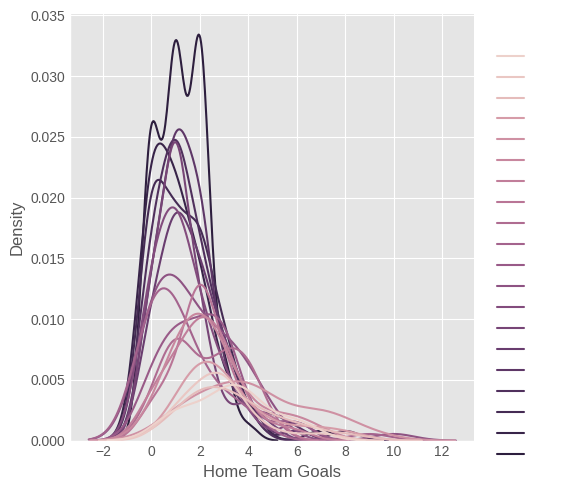

In [56]:
# prompt: Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
sns.displot(data=df, x="Home Team Goals", kind="kde", hue='Year')


**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

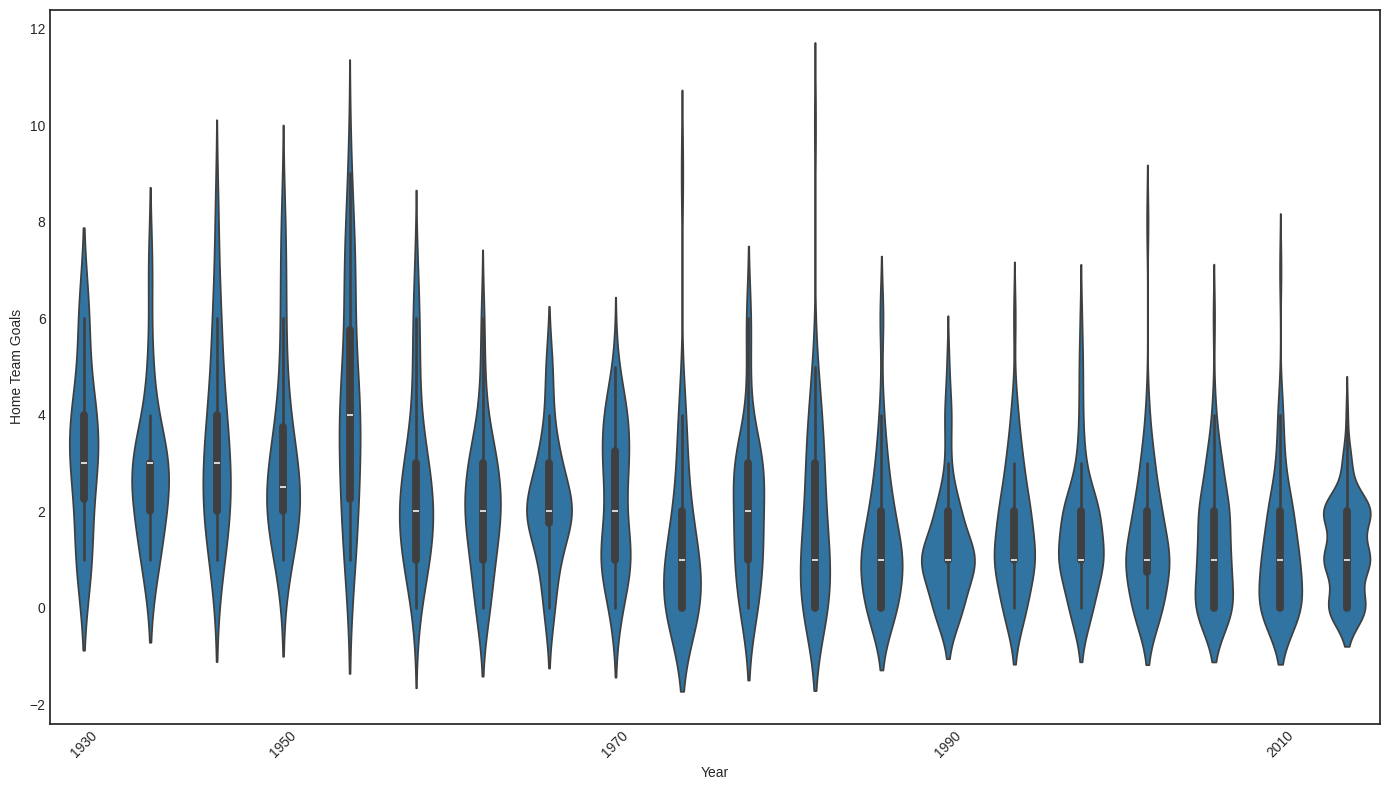

In [32]:
# Create the violin plot
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator  # Import FixedLocator
import seaborn as sns

plt.figure(figsize=(14, 8))
ax = sns.violinplot(data=df, x="Year", y="Home Team Goals")

# Prepare the labels for years ending in 0
years = sorted(df['Year'].unique())
years_ending_in_0 = [year for year in years if str(year).endswith('0')]
labels = [str(year) if year in years_ending_in_0 else '' for year in years]

# Set the x-axis labels
ax.xaxis.set_major_locator(FixedLocator(range(len(years)))) # Now FixedLocator is defined and can be used
ax.set_xticklabels(labels, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [38]:
!pip install joypy


In [39]:
import joypy as jp
import matplotlib.pyplot as plt
from matplotlib import cm

print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


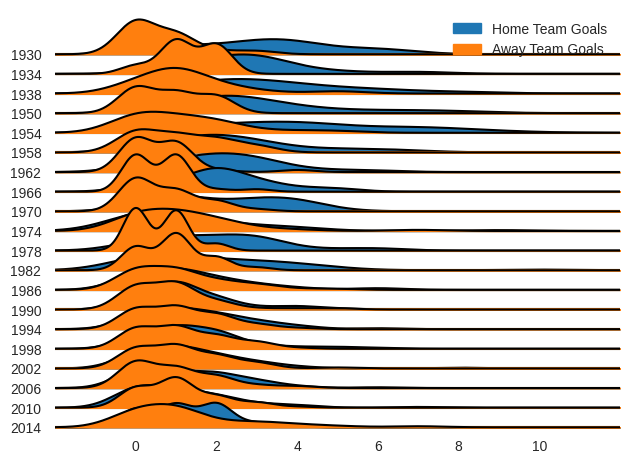

In [40]:
jp.joyplot(data=df, column=['Home Team Goals', 'Away Team Goals'], by='Year', legend=True)
plt.show()


<ipython-input-41-e757b4e1b849>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


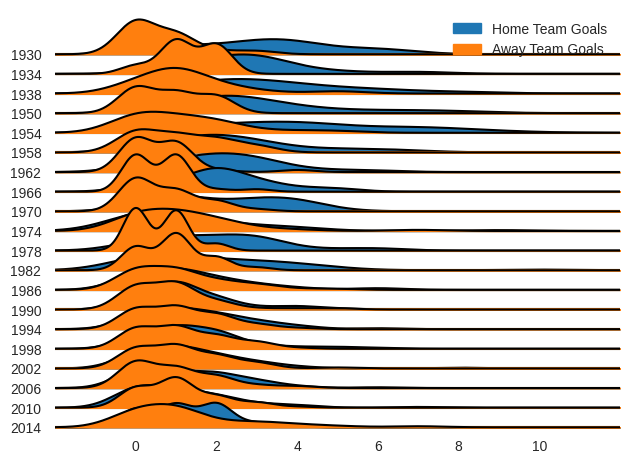

In [41]:
plt.style.use('seaborn-white')

jp.joyplot(data=df, column=['Home Team Goals', 'Away Team Goals'], by='Year', legend=True)
plt.show()


**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



In [57]:
# prompt:  Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

df_hometeamgoals = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()
print(df_hometeamgoals)


   Home Team Initials  Home Team Goals
0                 ALG                5
1                 ANG                0
2                 ARG              111
3                 AUS                7
4                 AUT               31
..                ...              ...
72                URU               62
73                USA               19
74                WAL                2
75                YUG               42
76                ZAI                0

[77 rows x 2 columns]


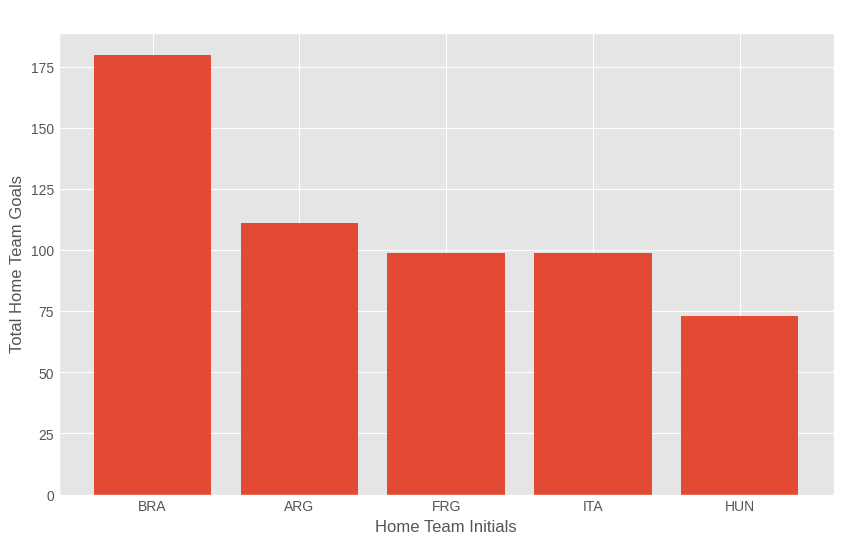

In [58]:
# prompt: Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

import matplotlib.pyplot as plt
df_top5 = df_hometeamgoals.sort_values('Home Team Goals', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(df_top5['Home Team Initials'], df_top5['Home Team Goals'])
plt.xlabel('Home Team Initials')
plt.ylabel('Total Home Team Goals')
plt.title('Top 5 Countries by Total Home Team Goals')
plt.show()


**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



In [61]:
# prompt: Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer and reprint

top4_initials = df_top5['Home Team Initials'].head(4).tolist()
df_top4 = df[df['Home Team Initials'].isin(top4_initials)]

print(df_top4)


     Year              Datetime                     Stage             Stadium  \
4    1930  15 Jul 1930 - 16:00                    Group 1      Parque Central   
10   1930  19 Jul 1930 - 15:00                    Group 1  Estadio Centenario   
11   1930  20 Jul 1930 - 13:00                    Group 2  Estadio Centenario   
14   1930  22 Jul 1930 - 14:45                    Group 1  Estadio Centenario   
15   1930  26 Jul 1930 - 14:45                Semi-finals  Estadio Centenario   
..    ...                   ...                       ...                 ...   
842  2014  01 Jul 2014 - 13:00                Round of 16  Arena de Sao Paulo   
845  2014  04 Jul 2014 - 17:00             Quarter-finals    Estadio Castelao   
846  2014  05 Jul 2014 - 13:00             Quarter-finals    Estadio Nacional   
848  2014  08 Jul 2014 - 17:00                Semi-finals    Estadio Mineirao   
850  2014  12 Jul 2014 - 17:00   Play-off for third place    Estadio Nacional   

                City Home T

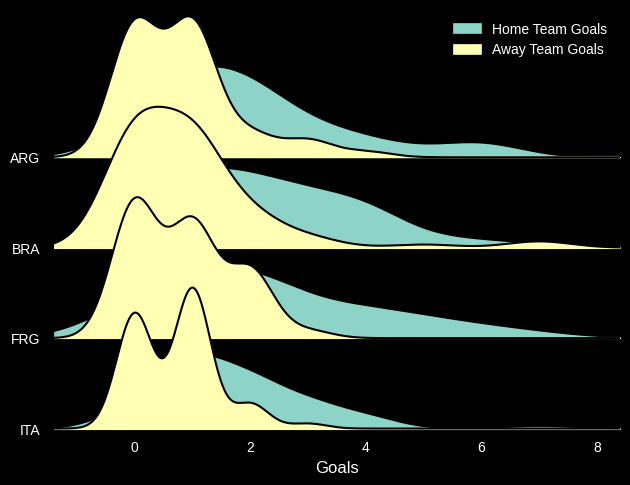

In [62]:
# prompt: Then use joyplot again to visualize densities for 'Home Team Goals' and 'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials').

import matplotlib.pyplot as plt
plt.style.use('dark_background')

jp.joyplot(data=df_top4, column=['Home Team Goals', 'Away Team Goals'], by='Home Team Initials', ylim='own', legend=True)
plt.xlabel('Goals')
plt.show()


**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [44]:
!pip install seaborn_qqplot

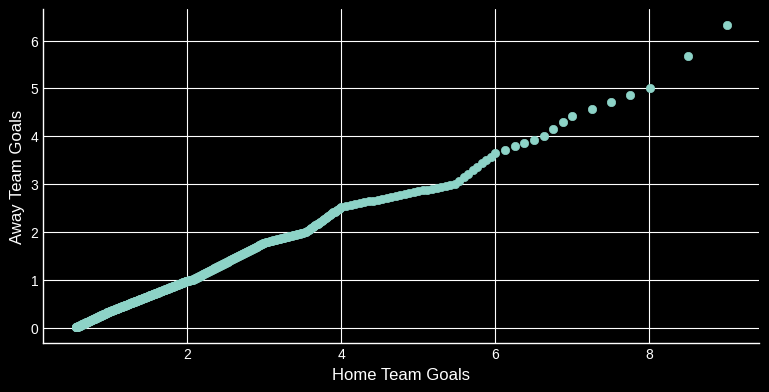

In [63]:
# prompt: draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals

import matplotlib.pyplot as plt
from seaborn_qqplot import pplot
pplot(df, x="Home Team Goals", y="Away Team Goals", kind='qq', height=4, aspect=2)
plt.show()


The graph above shows that the home team scored more goals at home. You can see this by looking at Home Team Goals of 2 and seeing the away team only scored 1. When looking at Home Team Goals of 8, the away team had only scored 5.